<a href="https://colab.research.google.com/github/Jake7Harvey/Data-Applications-in-Business/blob/main/ChatGPT_Blackjack_Ask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## First Iteration

In [2]:
import random

def initialize_deck():
    """Initialize a deck of 52 cards."""
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    deck = [{'rank': rank, 'suit': suit} for rank in ranks for suit in suits]
    random.shuffle(deck)
    return deck

def deal_card(deck):
    """Deal a card from the deck."""
    return deck.pop()

def calculate_hand_value(hand):
    """Calculate the value of a hand."""
    values = {'2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, 'J': 10, 'Q': 10, 'K': 10, 'A': 11}
    value = sum(values[card['rank']] for card in hand)
    # Adjust for Aces
    num_aces = sum(1 for card in hand if card['rank'] == 'A')
    while value > 21 and num_aces:
        value -= 10
        num_aces -= 1
    return value

def display_cards(player_hand, dealer_hand, show_dealer_card=False):
    """Display player's and dealer's cards."""
    print("Your cards:", player_hand)
    print("Dealer's cards:", [dealer_hand[0]] if show_dealer_card else ["Face down card"])

def make_prediction(player_hand, dealer_card):
    """Make a prediction based on the player's hand and the dealer's face-up card."""
    player_value = calculate_hand_value(player_hand)
    dealer_value = calculate_hand_value([dealer_card])

    # Simple prediction logic
    if player_value == 21:
        return "You have Blackjack! You're likely to win."
    elif player_value >= 17:
        return "You have a strong hand. It's recommended to stay."
    elif player_value <= 11:
        return "You have a weak hand. It's recommended to hit."
    elif 12 <= player_value <= 16 and dealer_value >= 7:
        return "You might want to stay. The dealer has a strong card."
    else:
        return "It's recommended to hit for another card."

def play_blackjack():
    """Play a simple game of Blackjack."""
    deck = initialize_deck()
    player_hand = [deal_card(deck), deal_card(deck)]
    dealer_hand = [deal_card(deck), deal_card(deck)]

    display_cards(player_hand, dealer_hand)

    # Make prediction
    prediction = make_prediction(player_hand, dealer_hand[0])
    print("\nPrediction:", prediction)

    # Player's turn
    while input("Do you want to hit? (y/n): ").lower() == 'y':
        player_hand.append(deal_card(deck))
        display_cards(player_hand, dealer_hand)
        player_value = calculate_hand_value(player_hand)

        # Check if player busted
        if player_value > 21:
            print("Busted! You lose.")
            return

    # Dealer's turn
    while calculate_hand_value(dealer_hand) < 17:
        dealer_hand.append(deal_card(deck))

    # Display final hands
    print("\nFinal hands:")
    display_cards(player_hand, dealer_hand, show_dealer_card=True)

    # Determine the winner
    player_value = calculate_hand_value(player_hand)
    dealer_value = calculate_hand_value(dealer_hand)

    if player_value > 21:
        print("Busted! You lose.")
    elif dealer_value > 21 or player_value > dealer_value:
        print("Congratulations! You win.")
    elif player_value < dealer_value:
        print("Sorry, you lose.")
    else:
        print("It's a tie!")

# Start the game
play_blackjack()


Your cards: [{'rank': '4', 'suit': 'Diamonds'}, {'rank': '10', 'suit': 'Hearts'}]
Dealer's cards: ['Face down card']

Prediction: It's recommended to hit for another card.
Do you want to hit? (y/n): n

Final hands:
Your cards: [{'rank': '4', 'suit': 'Diamonds'}, {'rank': '10', 'suit': 'Hearts'}]
Dealer's cards: [{'rank': '3', 'suit': 'Spades'}]
Sorry, you lose.


## Second Iteration

In [3]:
import random

def initialize_deck():
    """Initialize a deck of 52 cards."""
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    deck = [{'rank': rank, 'suit': suit} for rank in ranks for suit in suits]
    random.shuffle(deck)
    return deck

def deal_initial_cards(deck):
    """Deal two cards each to the player and the dealer."""
    player_hand = [deck.pop(), deck.pop()]
    dealer_hand = [deck.pop(), deck.pop()]
    return player_hand, dealer_hand

def calculate_hand_value(hand):
    """Calculate the value of a hand."""
    values = {'2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, 'J': 10, 'Q': 10, 'K': 10, 'A': 11}
    value = sum(values[card['rank']] for card in hand)
    # Adjust for Aces
    num_aces = sum(1 for card in hand if card['rank'] == 'A')
    while value > 21 and num_aces:
        value -= 10
        num_aces -= 1
    return value

def make_prediction(player_hand, dealer_card):
    """Make a prediction based on the player's hand and the dealer's face-up card."""
    player_value = calculate_hand_value(player_hand)
    dealer_value = calculate_hand_value([dealer_card])

    # Calculate winning percentage based on simple rules
    winning_percentage = 0

    if player_value == 21:
        prediction = "You have Blackjack! You're likely to win."
        winning_percentage = 1.0
    elif player_value >= 17:
        prediction = "You have a strong hand. It's recommended to stay."
        winning_percentage = 0.8
    elif player_value <= 11:
        prediction = "You have a weak hand. It's recommended to hit."
        winning_percentage = 0.4
    elif 12 <= player_value <= 16 and dealer_value >= 7:
        prediction = "You might want to stay. The dealer has a strong card."
        winning_percentage = 0.5
    else:
        prediction = "It's recommended to hit for another card."
        winning_percentage = 0.3

    return prediction, winning_percentage

def play_blackjack():
    """Play a simplified game of Blackjack."""
    deck = initialize_deck()
    player_hand, dealer_hand = deal_initial_cards(deck)

    # Display initial hands
    print("Your cards:", player_hand)
    print("Dealer's visible card:", dealer_hand[0])

    # Make prediction
    prediction, winning_percentage = make_prediction(player_hand, dealer_hand[0])
    print("\nPrediction:", prediction)
    print("Winning Percentage:", round(winning_percentage * 100, 2), "%")

    # Player's turn
    while input("Do you want to hit? (y/n): ").lower() == 'y':
        player_hand.append(deck.pop())
        print("Your cards:", player_hand)

        # Check if player busted
        if calculate_hand_value(player_hand) > 21:
            print("Busted! You lose.")
            return

    # Dealer's turn
    while calculate_hand_value(dealer_hand) < 17:
        dealer_hand.append(deck.pop())

    # Display final hands
    print("\nFinal hands:")
    print("Your cards:", player_hand)
    print("Dealer's cards:", dealer_hand)

    # Determine the winner
    player_value = calculate_hand_value(player_hand)
    dealer_value = calculate_hand_value(dealer_hand)

    if player_value > 21:
        print("Busted! You lose.")
    elif dealer_value > 21 or player_value > dealer_value:
        print("Congratulations! You win.")
    elif player_value < dealer_value:
        print("Sorry, you lose.")
    else:
        print("It's a tie!")

# Start the game
play_blackjack()


Your cards: [{'rank': '10', 'suit': 'Spades'}, {'rank': '3', 'suit': 'Spades'}]
Dealer's visible card: {'rank': '6', 'suit': 'Diamonds'}

Prediction: It's recommended to hit for another card.
Winning Percentage: 30.0 %
Do you want to hit? (y/n): y
Your cards: [{'rank': '10', 'suit': 'Spades'}, {'rank': '3', 'suit': 'Spades'}, {'rank': '5', 'suit': 'Hearts'}]
Do you want to hit? (y/n): n

Final hands:
Your cards: [{'rank': '10', 'suit': 'Spades'}, {'rank': '3', 'suit': 'Spades'}, {'rank': '5', 'suit': 'Hearts'}]
Dealer's cards: [{'rank': '6', 'suit': 'Diamonds'}, {'rank': '8', 'suit': 'Spades'}, {'rank': '5', 'suit': 'Clubs'}]
Sorry, you lose.


## Third Iteration

In [4]:
import random
import matplotlib.pyplot as plt

def initialize_deck():
    """Initialize a deck of 52 cards."""
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    deck = [{'rank': rank, 'suit': suit} for rank in ranks for suit in suits]
    random.shuffle(deck)
    return deck

def deal_initial_cards(deck):
    """Deal two cards each to the player and the dealer."""
    player_hand = [deck.pop(), deck.pop()]
    dealer_hand = [deck.pop(), deck.pop()]
    return player_hand, dealer_hand

def calculate_hand_value(hand):
    """Calculate the value of a hand."""
    values = {'2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, 'J': 10, 'Q': 10, 'K': 10, 'A': 11}
    value = sum(values[card['rank']] for card in hand)
    # Adjust for Aces
    num_aces = sum(1 for card in hand if card['rank'] == 'A')
    while value > 21 and num_aces:
        value -= 10
        num_aces -= 1
    return value

def make_prediction(player_hand, dealer_card):
    """Make a prediction based on the player's hand and the dealer's face-up card."""
    player_value = calculate_hand_value(player_hand)
    dealer_value = calculate_hand_value([dealer_card])

    # Calculate winning percentage based on simple rules
    winning_percentage = 0

    if player_value == 21:
        prediction = "You have Blackjack! You're likely to win."
        winning_percentage = 1.0
    elif player_value >= 17:
        prediction = "You have a strong hand. It's recommended to stay."
        winning_percentage = 0.8
    elif player_value <= 11:
        prediction = "You have a weak hand. It's recommended to hit."
        winning_percentage = 0.4
    elif 12 <= player_value <= 16 and dealer_value >= 7:
        prediction = "You might want to stay. The dealer has a strong card."
        winning_percentage = 0.5
    else:
        prediction = "It's recommended to hit for another card."
        winning_percentage = 0.3

    return prediction, winning_percentage

def play_blackjack():
    """Play a simplified game of Blackjack."""
    deck = initialize_deck()
    player_hand, dealer_hand = deal_initial_cards(deck)

    # Display initial hands
    print("Your cards:", player_hand)
    print("Dealer's visible card:", dealer_hand[0])

    # Make prediction for the player
    player_prediction, player_winning_percentage = make_prediction(player_hand, dealer_hand[0])
    print("\nPlayer's Prediction:", player_prediction)
    print("Player's Winning Percentage:", round(player_winning_percentage * 100, 2), "%")

    # Player's turn
    while input("Do you want to hit? (y/n): ").lower() == 'y':
        player_hand.append(deck.pop())
        print("Your cards:", player_hand)

        # Check if player busted
        if calculate_hand_value(player_hand) > 21:
            print("Busted! You lose.")
            return

    # Dealer's turn
    while calculate_hand_value(dealer_hand) < 17:
        dealer_hand.append(deck.pop())

    # Make prediction for the dealer
    dealer_prediction, dealer_winning_percentage = make_prediction(dealer_hand, player_hand[0])
    print("\nDealer's Prediction:", dealer_prediction)
    print("Dealer's Winning Percentage:", round(dealer_winning_percentage * 100, 2), "%")

    # Display final hands
    print("\nFinal hands:")
    print("Your cards:", player_hand)
    print("Dealer's cards:", dealer_hand)

    # Determine the winner
    player_value = calculate_hand_value(player_hand)
    dealer_value = calculate_hand_value(dealer_hand)

    if player_value > 21:
        print("Busted! You lose.")
    elif dealer_value > 21 or player_value > dealer_value:
        print("Congratulations! You win.")
        result = 1  # Player wins
    elif player_value < dealer_value:
        print("Sorry, you lose.")
        result = -1  # Dealer wins
    else:
        print("It's a tie!")
        result = 0  # It's a tie

    return player_winning_percentage, result

def plot_scatter(predictions, results):
    """Plot a scatter plot of winning percentage versus results."""
    plt.scatter(predictions, results, color='blue', alpha=0.5)
    plt.title('Blackjack Winning Percentage vs. Result')
    plt.xlabel('Winning Percentage')
    plt.ylabel('Result (1: Win, 0: Tie, -1: Lose)')
    plt.show()

def main():
    num_simulations = 100
    predictions = []
    results = []

    for _ in range(num_simulations):
        player_winning_percentage, result = play_blackjack()
        predictions.append(player_winning_percentage)
        results.append(result)

    # Plot the scatter plot
    plot_scatter(predictions, results)

if __name__ == "__main__":
    main()


Your cards: [{'rank': '5', 'suit': 'Diamonds'}, {'rank': 'K', 'suit': 'Diamonds'}]
Dealer's visible card: {'rank': '5', 'suit': 'Hearts'}

Player's Prediction: It's recommended to hit for another card.
Player's Winning Percentage: 30.0 %
Do you want to hit? (y/n): y
Your cards: [{'rank': '5', 'suit': 'Diamonds'}, {'rank': 'K', 'suit': 'Diamonds'}, {'rank': '5', 'suit': 'Clubs'}]
Do you want to hit? (y/n): n

Dealer's Prediction: You have a strong hand. It's recommended to stay.
Dealer's Winning Percentage: 80.0 %

Final hands:
Your cards: [{'rank': '5', 'suit': 'Diamonds'}, {'rank': 'K', 'suit': 'Diamonds'}, {'rank': '5', 'suit': 'Clubs'}]
Dealer's cards: [{'rank': '5', 'suit': 'Hearts'}, {'rank': 'A', 'suit': 'Hearts'}, {'rank': '9', 'suit': 'Diamonds'}, {'rank': 'Q', 'suit': 'Diamonds'}]
Congratulations! You win.
Your cards: [{'rank': 'A', 'suit': 'Diamonds'}, {'rank': '6', 'suit': 'Spades'}]
Dealer's visible card: {'rank': '9', 'suit': 'Spades'}

Player's Prediction: You have a stro

KeyboardInterrupt: Interrupted by user

## Final Iteration

Do you want to play another round? (y/n): y

Player's Prediction: You might want to stay. The dealer has a strong card.
Player's Winning Percentage: 50.0 %
Do you want to hit? (y/n): y
Your cards: [{'rank': '3', 'suit': 'Clubs'}, {'rank': 'K', 'suit': 'Clubs'}, {'rank': 'Q', 'suit': 'Hearts'}]
Busted! You lose.
Do you want to play another round? (y/n): y

Player's Prediction: You have a strong hand. It's recommended to stay.
Player's Winning Percentage: 80.0 %
Do you want to hit? (y/n): n

Dealer's Prediction: You have a strong hand. It's recommended to stay.
Dealer's Winning Percentage: 80.0 %

Final hands:
Your cards: [{'rank': '7', 'suit': 'Clubs'}, {'rank': '10', 'suit': 'Spades'}]
Dealer's cards: [{'rank': '6', 'suit': 'Clubs'}, {'rank': 'K', 'suit': 'Clubs'}, {'rank': '7', 'suit': 'Spades'}]
Congratulations! You win.
Do you want to play another round? (y/n): n


ValueError: x and y must be the same size

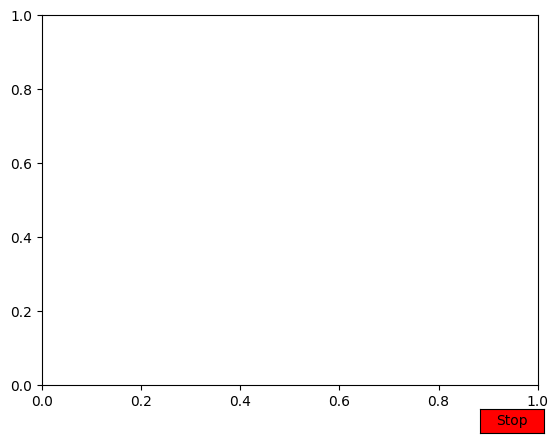

In [5]:
import random
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

class BlackjackSimulator:
    def __init__(self):
        self.deck = []
        self.player_hand = []
        self.dealer_hand = []
        self.predictions = []
        self.results = []

        self.fig, self.ax = plt.subplots()
        self.ax_stop = plt.axes([0.81, 0.01, 0.1, 0.05])
        self.btn_stop = Button(self.ax_stop, 'Stop', color='red')
        self.btn_stop.on_clicked(self.stop_simulation)

    def initialize_deck(self):
        """Initialize a deck of 52 cards."""
        ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
        suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
        self.deck = [{'rank': rank, 'suit': suit} for rank in ranks for suit in suits]
        random.shuffle(self.deck)

    def deal_initial_cards(self):
        """Deal two cards each to the player and the dealer."""
        self.player_hand = [self.deck.pop(), self.deck.pop()]
        self.dealer_hand = [self.deck.pop(), self.deck.pop()]

    def calculate_hand_value(self, hand):
        """Calculate the value of a hand."""
        values = {'2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, 'J': 10, 'Q': 10, 'K': 10, 'A': 11}
        value = sum(values[card['rank']] for card in hand)
        # Adjust for Aces
        num_aces = sum(1 for card in hand if card['rank'] == 'A')
        while value > 21 and num_aces:
            value -= 10
            num_aces -= 1
        return value

    def make_prediction(self):
        """Make a prediction based on the player's hand and the dealer's face-up card."""
        player_value = self.calculate_hand_value(self.player_hand)
        dealer_value = self.calculate_hand_value([self.dealer_hand[0]])

        # Calculate winning percentage based on simple rules
        winning_percentage = 0

        if player_value == 21:
            prediction = "You have Blackjack! You're likely to win."
            winning_percentage = 1.0
        elif player_value >= 17:
            prediction = "You have a strong hand. It's recommended to stay."
            winning_percentage = 0.8
        elif player_value <= 11:
            prediction = "You have a weak hand. It's recommended to hit."
            winning_percentage = 0.4
        elif 12 <= player_value <= 16 and dealer_value >= 7:
            prediction = "You might want to stay. The dealer has a strong card."
            winning_percentage = 0.5
        else:
            prediction = "It's recommended to hit for another card."
            winning_percentage = 0.3

        self.predictions.append(winning_percentage)
        return prediction, winning_percentage

    def play_blackjack(self):
        """Play a simplified game of Blackjack."""
        self.initialize_deck()
        self.deal_initial_cards()

        # Make prediction for the player
        player_prediction, player_winning_percentage = self.make_prediction()
        print("\nPlayer's Prediction:", player_prediction)
        print("Player's Winning Percentage:", round(player_winning_percentage * 100, 2), "%")

        # Player's turn
        while input("Do you want to hit? (y/n): ").lower() == 'y':
            self.player_hand.append(self.deck.pop())
            print("Your cards:", self.player_hand)

            # Check if player busted
            if self.calculate_hand_value(self.player_hand) > 21:
                print("Busted! You lose.")
                self.results.append(-1)
                return

        # Dealer's turn
        while self.calculate_hand_value(self.dealer_hand) < 17:
            self.dealer_hand.append(self.deck.pop())

        # Make prediction for the dealer
        dealer_prediction, dealer_winning_percentage = self.make_prediction()
        print("\nDealer's Prediction:", dealer_prediction)
        print("Dealer's Winning Percentage:", round(dealer_winning_percentage * 100, 2), "%")

        # Display final hands
        print("\nFinal hands:")
        print("Your cards:", self.player_hand)
        print("Dealer's cards:", self.dealer_hand)

        # Determine the winner
        player_value = self.calculate_hand_value(self.player_hand)
        dealer_value = self.calculate_hand_value(self.dealer_hand)

        if player_value > 21:
            print("Busted! You lose.")
            self.results.append(-1)
        elif dealer_value > 21 or player_value > dealer_value:
            print("Congratulations! You win.")
            self.results.append(1)
        elif player_value < dealer_value:
            print("Sorry, you lose.")
            self.results.append(-1)
        else:
            print("It's a tie!")
            self.results.append(0)

        return player_winning_percentage

    def stop_simulation(self, event):
        """Stop the simulation and plot the scatter plot."""
        plt.close()
        self.plot_scatter()

    def plot_scatter(self):
        """Plot a scatter plot of winning percentage versus results."""
        plt.scatter(self.predictions, self.results, color='blue', alpha=0.5)
        plt.title('Blackjack Winning Percentage vs. Result')
        plt.xlabel('Winning Percentage')
        plt.ylabel('Result (1: Win, 0: Tie, -1: Lose)')
        plt.show()

if __name__ == "__main__":
    simulator = BlackjackSimulator()
    while input("Do you want to play another round? (y/n): ").lower() == 'y':
        simulator.play_blackjack()
    simulator.plot_scatter()
